### Autorki rozwiązania: Agnieszka Prudło i Aleksandra Krzemińska

# Podział pracy
Obie zrobiłyśmy wszystkie zadania, a następnie przedyskutowałyśmy rozwiązania i wybrałyśmy najbardziej dokładne i czytelne wersje.

W zadaniu 4 nie mogłyśmy zdecydować, czy dzień z przekroczoną normą to taki, gdzie przynjamniej 1 pomiar jest powyżej normy, czy średnia pomiarów z doby jest powyżej normy. Z tego powodu zostawiłyśmy obie wersje rozwiązania (rónica w kodzie jest bardzo niewielka, jedno użycie funkcji .max() lub .mean())


### 1. Wczytanie i czyszczenie danych

Wczytaj dane dla lat **2014, 2019 i 2024**, oczyścić je z niepotrzebnych wierszy oraz ujednolić ich format. Zaktualizuj stare kody stacji zgodnie z metadanymi. Pozostaw tylko stacje występujące we wszystkich trzech latach. Informacje o stacjach pomiarowych warto uzupełnić o miejscowości dostępne w metadanych, np. za pomocą MultiIndex: (miejscowość, kod stacji). Pomiary dokonane o północy (00:00:00) powinny być potraktowane jako dotyczące poprzedniego dnia. Połącz dane z trzech lat w jeden `DataFrame` i zapisz do pliku.

In [1]:
import data_loader

In [2]:
# id archiwum dla poszczególnych lat
gios_archive_url = "https://powietrze.gios.gov.pl/pjp/archives/downloadFile/"
gios_url_ids = {2014: '302', 2019: '322', 2024: '582'}
gios_pm25_file = {2014: '2014_PM2.5_1g.xlsx', 2019: '2019_PM25_1g.xlsx', 2024: '2024_PM25_1g.xlsx'}

# ściągnij dane dla poszczególnych lat
df2024 = data_loader.download_gios_archive(2024, gios_url_ids[2024], gios_pm25_file[2024], gios_archive_url)
df2019 = data_loader.download_gios_archive(2019, gios_url_ids[2019], gios_pm25_file[2019], gios_archive_url)
df2014 = data_loader.download_gios_archive(2014, gios_url_ids[2014], gios_pm25_file[2014], gios_archive_url)

c:\Users\agnie\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [3]:
# usuwanie niepotrzebnych wierszy
# ujednolicanie struktury danych

df2024_edited = data_loader.edit_df(df2024, 2024)
df2019_edited = data_loader.edit_df(df2019, 2019)
df2014_edited = data_loader.edit_df(df2014, 2014)

Liczba dni w 2024 się zgadza

Liczba dni w 2019 się zgadza

Liczba dni w 2014 się zgadza



In [4]:
# pobieranie metadanych stacji pomiarowych

# url metadanych
gios_metadata_url = "https://powietrze.gios.gov.pl/pjp/archives/downloadFile/622"

gios_metadata = data_loader.download_gios_metadata(gios_metadata_url)

In [5]:
# stworzenie słownika mapującego stare kody stacji na nowe

code_map, df_edited = data_loader.create_code_map(gios_metadata, [df2014_edited, df2019_edited, df2024_edited])

df2014_edited = df_edited[0]
df2019_edited = df_edited[1]
df2024_edited = df_edited[2]

In [6]:
# wspólne kolumny dla wszystkich lat

common_cols, common_dfs = data_loader.find_common_columns([df2024_edited, df2019_edited, df2014_edited])

# wybierz tylko wspólne kolumny
df2024_edited_common = common_dfs[0]
df2019_edited_common = common_dfs[1]
df2014_edited_common = common_dfs[2]

Liczba kolumn się zgadza: 23


In [7]:
# tworzymy MultiIndex

multindex_dfs = data_loader.multiindex_code_city([df2024_edited_common, df2019_edited_common, df2014_edited_common], gios_metadata, common_cols)

df2024_edited_common = multindex_dfs[0]
df2019_edited_common = multindex_dfs[1]
df2014_edited_common = multindex_dfs[2]

In [8]:
# korekta indeksu daty i godziny (przesunięcie rekordów o 00:00:00 na poprzedni dzień)

df2014_edited_common = data_loader.correct_datetime_index(df2014_edited_common)
df2019_edited_common = data_loader.correct_datetime_index(df2019_edited_common)
df2024_edited_common = data_loader.correct_datetime_index(df2024_edited_common)

In [9]:
# scalenie danych z poszczególnych lat, zapis do pliku CSV i kontrola poprawności
df_all = data_loader.save_combined_data([df2024_edited_common, df2019_edited_common, df2014_edited_common], "poziom_zanieczyszczeń.csv")

# sprawdzenie wyglądu scalonych danych
df_all.head()

2014    365
2019    365
2024    366
dtype: int64
(8784, 23)
(8760, 23)
(8760, 23)
(26304, 23)
26304


Wrocław    Bydgoszcz         Łódź       Zgierz  \
                    DsWrocAlWisn KpBydPlPozna LdLodzCzerni LdZgieMielcz   
2024-01-01 01:00:00         44.8         37.4         28.5         43.2   
2024-01-01 02:00:00         39.9         18.8         73.9         39.2   
2024-01-01 03:00:00         33.2           19         66.5         39.2   
2024-01-01 04:00:00         30.9         18.7         66.8         40.2   
2024-01-01 05:00:00         29.4           19         58.4         40.2   

                    Zielona Góra       Kraków                 Legionowo  \
                    LuZielKrotka MpKrakAlKras MpKrakBulwar MzLegZegrzyn   
2024-01-01 01:00:00         42.1         38.3         75.8         49.9   
2024-01-01 02:00:00           53         13.6         92.5         15.4   
2024-01-01 03:00:00         71.7         15.9        100.6         14.3   
2024-01-01 04:00:00         72.7         13.4         60.5           17   
2024-01-01 05:00:00         67.6         13.1           60         27.2   

                           Płock        Radom  ...     Żyrardów  \
                    MzPlocMiReja MzRadTochter  ... MzZyraRoosev   
2024-01-01 01:00:00         68.4         39.8  ...         59.9   
2024-01-01 02:00:00         66.1         38.6  ...         35.1   
2024-01-01 03:00:00         49.2         31.5  ...         35.3   
2024-01-01 04:00:00         40.6         29.7  ...         35.4   
2024-01-01 05:00:00         40.7         29.3  ...         37.6   

                    Kędzierzyn-Koźle     Przemyśl       Gdańsk     Katowice  \
                        OpKKozBSmial PkPrzemGrunw PmGdaLeczkow SlKatoKossut   
2024-01-01 01:00:00             38.2         27.9         10.4         68.6   
2024-01-01 02:00:00             21.9         21.7          9.8         57.4   
2024-01-01 03:00:00             19.9         21.1         12.1         56.3   
2024-01-01 04:00:00             23.2         20.7         14.5         66.1   
2024-01-01 05:00:00               21         19.8         16.8         63.7   

                     Złoty Potok      Olsztyn       Kalisz     Szczecin  \
                    SlZlotPotLes WmOlsPuszkin WpKaliSawick ZpSzczAndrze   
2024-01-01 01:00:00         90.7         45.7         65.6           94   
2024-01-01 02:00:00         43.1         40.4         37.7         44.8   
2024-01-01 03:00:00         35.3         44.1         38.4         20.2   
2024-01-01 04:00:00         36.9         38.6         35.6         14.7   
2024-01-01 05:00:00         38.4           33         33.1         17.2   

                                  
                    ZpSzczPilsud  
2024-01-01 01:00:00         48.1  
2024-01-01 02:00:00           22  
2024-01-01 03:00:00         21.6  
2024-01-01 04:00:00         23.8  
2024-01-01 05:00:00         27.9  

[5 rows x 23 columns]

### 2. Średnie miesięczne + trend dla miast

Oblicz średnie miesięczne stężenie PM2.5 dla każdej stacji i roku. Dla **Warszawy** i **Katowic**, po uśrednieniu po wszystkich stacjach z tych miast, narysuj wykres liniowy pokazujący trend średnich miesięcznych wartości PM2.5 w 2014 i 2024 roku. Oś X - miesiące (1-12); oś Y - średnia wartość PM2.5; 4 linie trendu. Dołącz opis i interpretację obserwowanych różnic.

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# obliczanie średnich miesięcznych dla każdego roku i stacji

monthly = {}

def monthly_mean(df):
    df_copy = df.copy()
    df_copy['miesiąc'] = df_copy.index.month
    df_copy['rok'] = df_copy.index.year
    df_copy = df_copy.set_index(['rok', 'miesiąc'])

    # średnia miesięczna
    monthly_mean = df_copy.groupby(level=['rok', 'miesiąc']).mean()
    return monthly_mean

monthly_df = monthly_mean(df_all)
monthly_df

Wrocław    Bydgoszcz         Łódź       Zgierz Zielona Góra  \
             DsWrocAlWisn KpBydPlPozna LdLodzCzerni LdZgieMielcz LuZielKrotka   
rok  miesiąc                                                                    
2014 1          42.797037    30.616434    35.407387    31.518199    42.946602   
     2          38.649351    51.856173    45.704915    46.359747    33.748299   
     3             36.125    40.556041    35.259896    36.861373    37.276358   
     4          25.353659    19.772776    23.474251    18.767278    23.778929   
     5          14.963925     11.90341    16.407493    11.068347    12.545727   
     6          12.160121     9.298433    14.518648     6.742433     12.42236   
     7          15.945985    13.444708    18.111519     8.013444    17.189873   
     8          12.982327    11.135863    16.008222      7.29842    12.459618   
     9          23.489083    20.824928    26.981774    12.637631    19.722835   
     10         35.526761    34.510773    36.905487    22.638426    28.407028   
     11         42.607519    36.765969    40.767644    24.943106    49.757198   
     12         44.335203     21.79606    46.016825    35.692493    30.137021   
2019 1          30.098849     30.53665    29.802108    47.697331    20.267772   
     2          31.104852    30.970726    28.895296    44.070254    20.544711   
     3            19.1796    16.377068    18.958108    31.698762    11.838743   
     4          21.718586     20.67992    19.223611    22.946328    14.053656   
     5          13.776702    15.580947    12.780323    14.815451     8.342351   
     6          12.825616    20.193602    11.119444    14.799107    10.350858   
     7           11.02603    12.522816     7.969086    10.014388     8.842472   
     8          11.148639    19.318594      9.34543    14.877493    10.035961   
     9           12.52082    15.593327     12.35865    19.233645     8.899498   
     10         20.090519    24.574939    20.396226     33.51385    14.256459   
     11         23.608889    27.440278    21.362745    29.178063    19.004625   
     12         23.432526    24.857317    21.565868     35.52168    17.188602   
2024 1          24.596505    17.465593    19.651556    34.638128    13.486951   
     2          16.553401    14.689098    15.920893    23.898549    13.368375   
     3          24.241184    23.096828    21.435484    29.892339    27.689058   
     4          11.894437    11.310778     9.441337    14.085376     14.02563   
     5          11.041256    10.873099    10.557143     8.741655    18.892276   
     6          10.509471      8.96173     9.704167     9.009801    15.520613   
     7            9.09769     7.758732     7.758681     8.683737     10.88358   
     8          11.574059     9.209726     9.851478    10.932571    13.275719   
     9          13.114571    12.913372    13.984844    14.973056    19.249787   
     10         15.125575    13.104191    16.039838    22.542396    16.264714   
     11         20.102646     14.33239    20.072308    33.866328    15.278151   
     12         24.586388    12.487615     21.66568    36.112635    12.673181   

                   Kraków                 Legionowo        Płock        Radom  \
             MpKrakAlKras MpKrakBulwar MzLegZegrzyn MzPlocMiReja MzRadTochter   
rok  miesiąc                                                                    
2014 1          60.350806    47.241565    39.815343    31.855108    40.485457   
     2          86.708955    62.591045    62.753609    50.473512    53.218289   
     3          54.498652    39.900135    47.863719    31.600595    43.391626   
     4            34.7433    24.543417    27.777273    20.852646    27.699527   
     5          19.547718    14.522849    14.622747    12.079019    14.581354   
     6          21.068056    14.140473     11.40353     9.624125    12.382569   
     7           20.83871    14.062162    13.315285    12.634177    14.962917   
     8          17.806452    12.622312     10.91

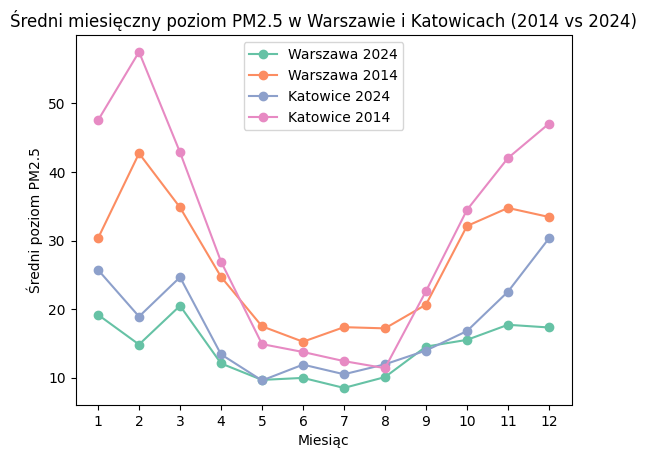

In [26]:
# wykres porównujący średnie miesięczne poziomy PM2.5 w Warszawie i Katowicach w 2014 i 2024 roku

# średnie dla stacji
warsaw_2024 = monthly_df.loc[2024, 'Warszawa'].mean(axis = 1)
warsaw_2014 = monthly_df.loc[2014, 'Warszawa'].mean(axis = 1)

katowice_2024 = monthly_df.loc[2024, 'Katowice'].mean(axis = 1)
katowice_2014 = monthly_df.loc[2014, 'Katowice'].mean(axis = 1)

colors = plt.cm.Set2.colors

# wykres
plt.plot(warsaw_2024.index, warsaw_2024.values, label='Warszawa 2024', marker='o', color=colors[0])
plt.plot(warsaw_2014.index, warsaw_2014.values, label='Warszawa 2014', marker='o', color=colors[1])
plt.plot(katowice_2024.index, katowice_2024.values, label='Katowice 2024', marker='o', color=colors[2])
plt.plot(katowice_2014.index, katowice_2014.values, label='Katowice 2014', marker='o', color=colors[3])
plt.xlabel('Miesiąc')
plt.xticks(range(1,13))
plt.ylabel('Średni poziom PM2.5')
plt.title('Średni miesięczny poziom PM2.5 w Warszawie i Katowicach (2014 vs 2024)')
plt.legend()
plt.show()

# Opis

W roku 2014 zanieczyszczenie powietrza było wyższe niż w 2024 zarówno w Warszawie jak i w Katowicach. Krzywe wskazują również na większe zanieczyszecznie powietrza zimą, co może być spowodowane zwiększonym zapotrzebowaniem energetycznym. W Katowicach poziom zanieczyszczeń w każdym roku jest wyższy niż w Warszawie (z wyłaczeniem miesięcy letnich: od maja do września 2014). Może to być spowodowane faktem, że Katowice są miastem górniczym. Co ciekawe, w roku 2014 luty był najbardziej zanieczyszczonym miesiącem w obu miastach, a w 2024 nie obserwujemy już takiego zjawiska. Wykres pokazuje, że w ciągu ostatnich lat stan powietrza poprawił się.

### 3. Heatmapa miesięcznych średnich

Dla każdej miejscowości przedstaw heatmapę średnich miesięcznych stężeń PM2.5 w latach lat 2014, 2019 i 2024 (oś X – miesiąc, oś Y – rok). Uśrednij wartości po wszystkich stacjach w danej miejscowości. Każdy panel (facet) ma odpowiadać jednej miejscowości. Dołącz interpretację obserwowanych wyników.

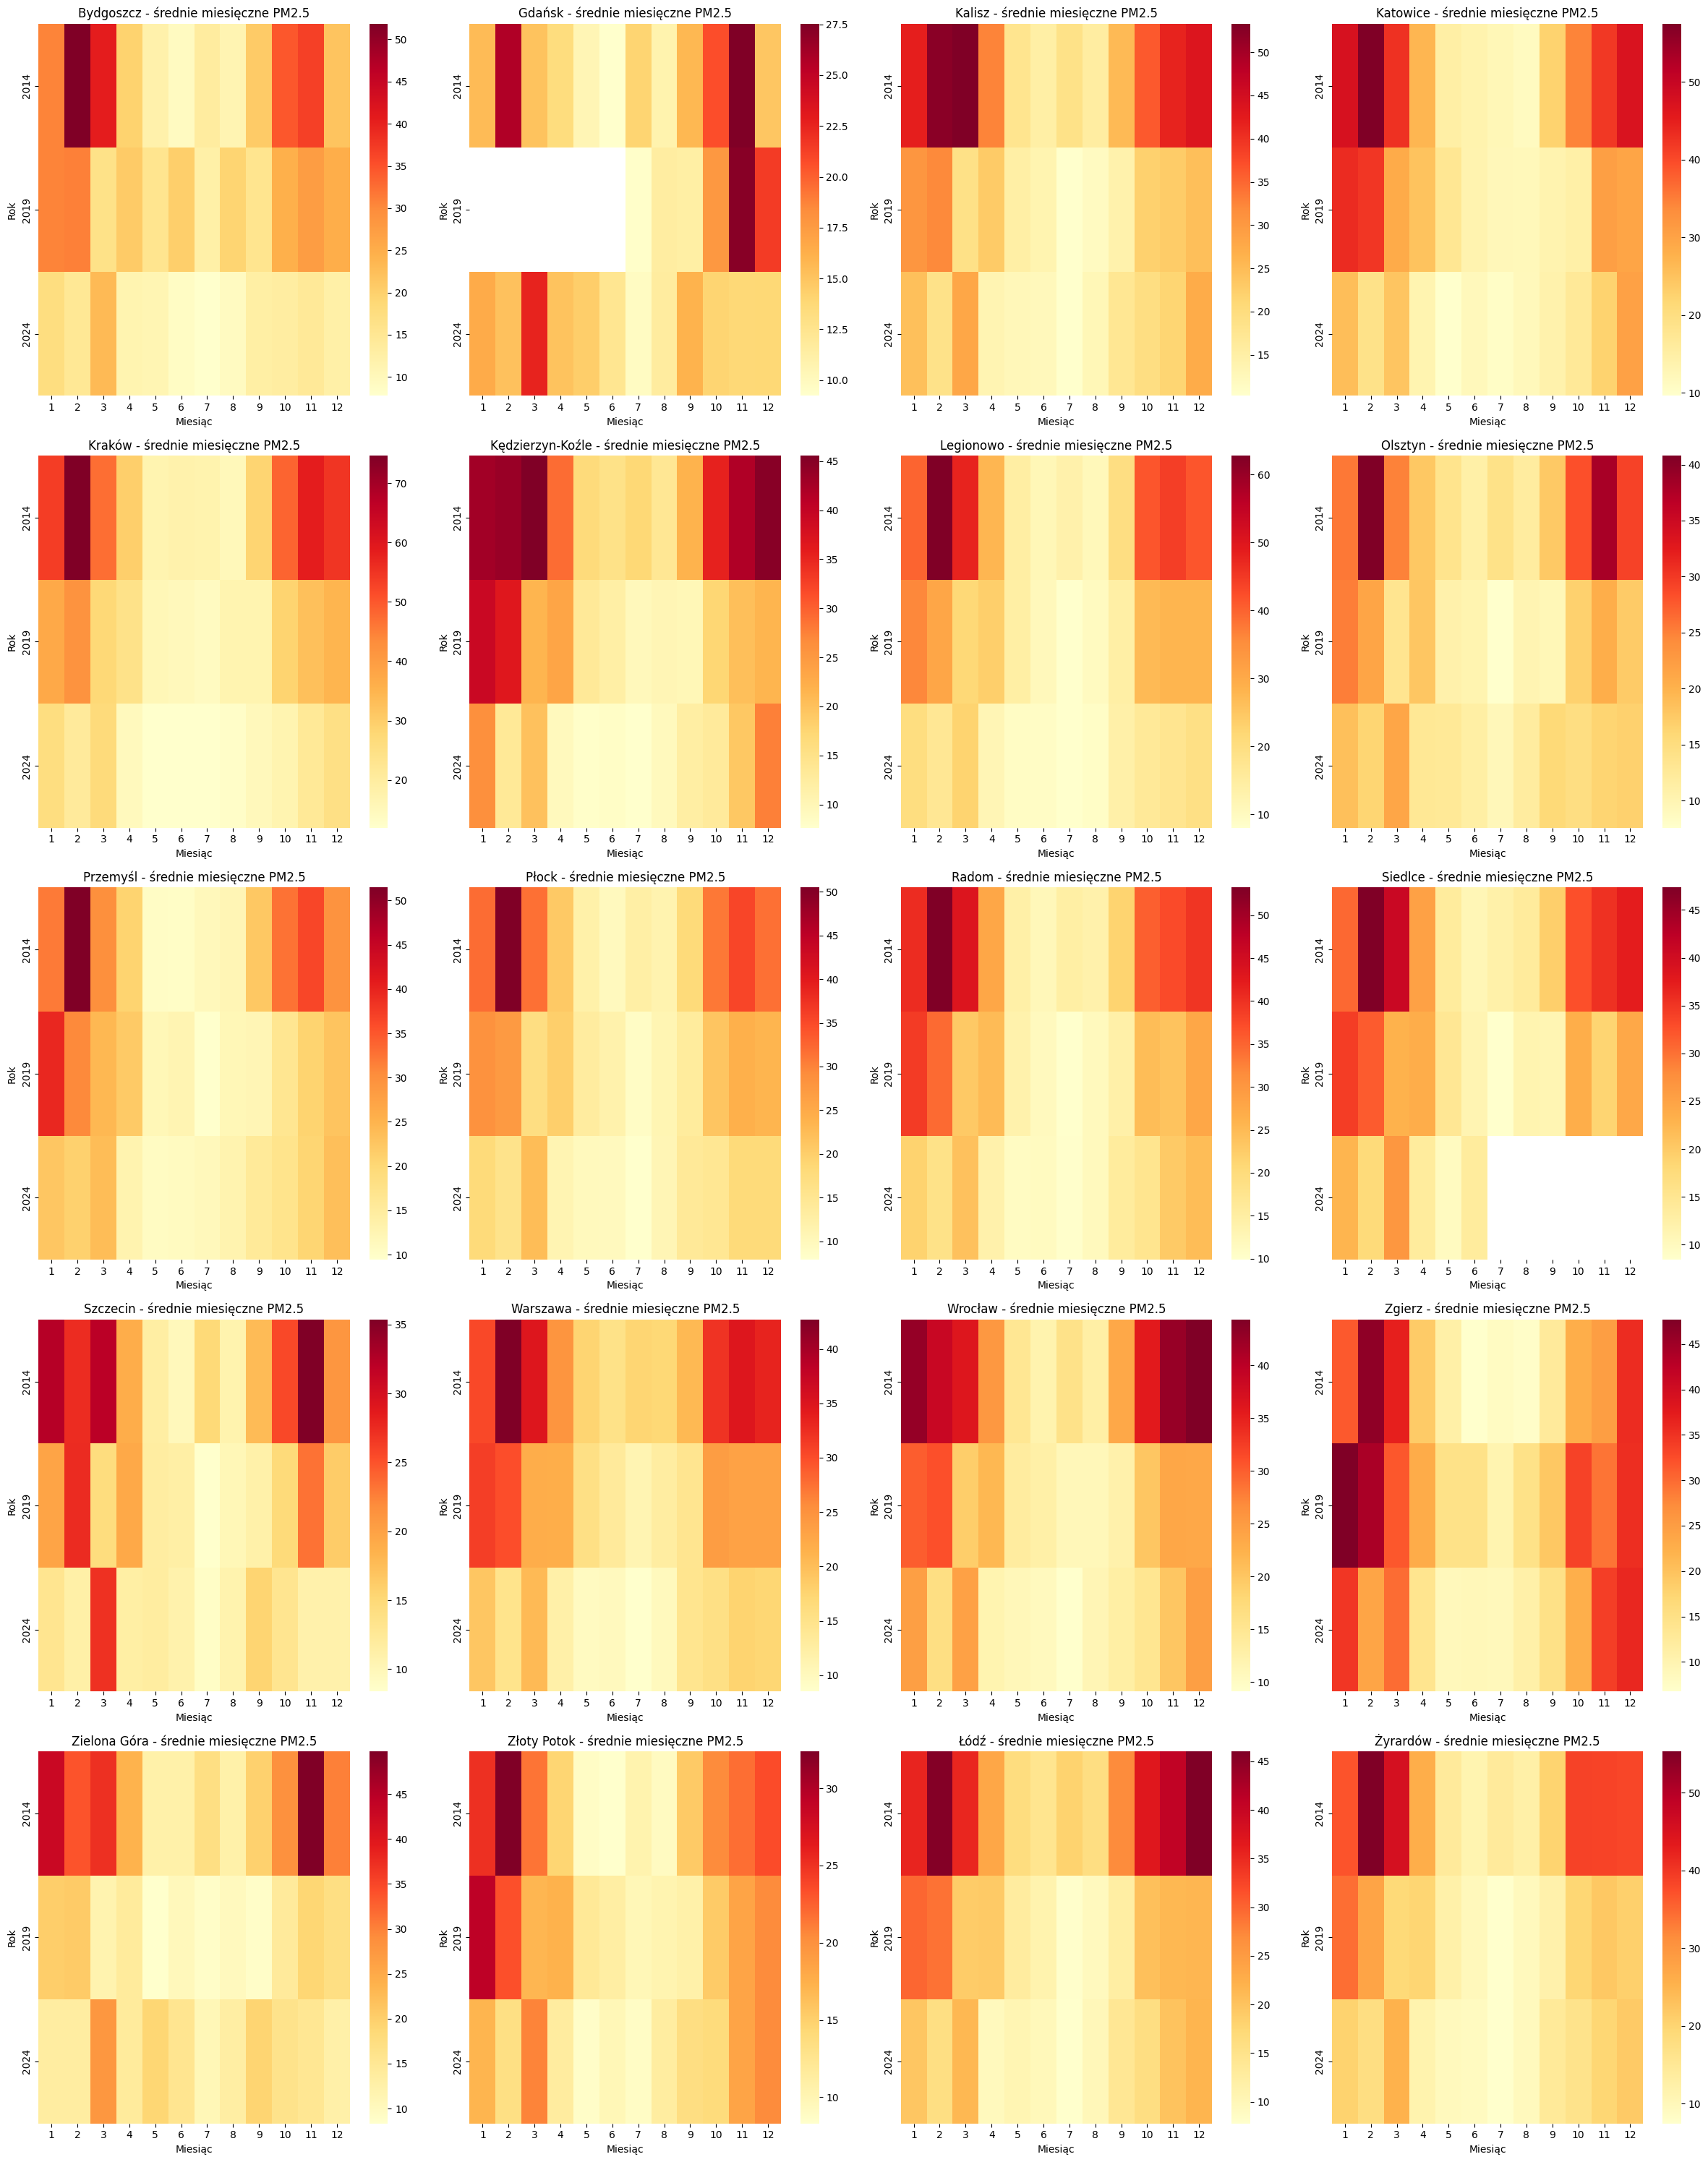

In [27]:
import numpy as np

# lista miast
cities = [c for c in monthly_df.columns.levels[0] if c not in ['miesiąc', 'rok']]
n = len(cities)

# siatka podwykresów
cols = 4
rows = int(np.ceil(n / cols))

fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 6 * rows))
axes = axes.flatten()

for ax, city in zip(axes, cities):
    
    # średnie wartości miesięczne dla miasta 
    city_data = monthly_df[city].mean(axis=1)
    city_data = city_data.reset_index()
    city_data.columns = ['rok', 'miesiąc', 'PM2.5']
    city_data['PM2.5'] = pd.to_numeric(city_data['PM2.5'])

    df_pivot = city_data.pivot(index='rok', columns='miesiąc', values='PM2.5')

    sns.heatmap(df_pivot, cmap='YlOrRd', ax=ax)
    ax.set_title(f'{city} - średnie miesięczne PM2.5')
    ax.set_xlabel('Miesiąc')
    ax.set_ylabel('Rok')

# Jeśli zostały puste osie, wyłączamy je
for ax in axes[n:]:
    ax.axis("off")

plt.tight_layout()
plt.show()

# Opis

Na wykresach widać duże różnice w zanieczyszczeniach w zależności od pory roku: w miesiącach zimowych jest ono wyższe, szczególnie w 2014 roku. Wynika to prawdopodobnie z konieczności ogrzewania budynków i większego zapotrzebowania na energię. Widać także, że w późniejszych latach ogólne zanieczyszczenie jest niższe- stan powietrza z roku na rok się poprawia.

Zauważalny jest także brak danych dla Gdańska w pierwszej połowie 2019 roku oraz dla Siedlec w drugiej połowie 2024 roku.

### 4. Dni z przekroczeniem normy (WHO)

Dla każdej stacji i roku policz liczbę dni, w których wystąpiło przekroczenie dobowej normy stężenia PM2.5, czyli 15 µg/m³ (źródło: [https://airscan.org/new-who-air-quality-guidelines-2021/](https://airscan.org/new-who-air-quality-guidelines-2021/)). Znajdź 3 stacje z najmniejszą i 3 stacje z największą liczbą dni z przekroczeniem normy dobowej w 2024 roku. Dla tych 6 stacji narysuj *grouped barplot*, gdzie oś X – stacje, oś Y – liczba dni z przekroczeniem, kolor – rok (2014, 2019, 2024). Dołącz opis i interpretację obserwowanych różnic.

In [28]:
norm = 15

df_all_days = df_all.copy().sort_index()
df_all_days['data'] = pd.to_datetime(df_all_days.index.date)
df_all_days = df_all_days.set_index('data')
df_all_max = df_all_days.groupby(['data']).max() # maksymalne dzienne wartości (jeśli chcemy sprawdzić, czy danego dnia norma była przekroczona, to najwyższa wartość z danego dnia ma znaczenie)

norms = {}

for year in [2014, 2019, 2024]:
    df_station = df_all_max[df_all_max.index.year == year] # dane dla danego roku
    norms[year] = np.array((df_station>norm).sum().values) # liczba dni przekroczenia normy dla każdej stacji

norms_df = pd.DataFrame(norms, index=df_all_max.columns)
norms_df.sort_values(by=2024) # sortowanie według liczby dni przekroczenia normy w 2024
        

,,2014,2019,2024
Siedlce,MzSiedKonars,338,305,136
Szczecin,ZpSzczAndrze,294,240,176
Kędzierzyn-Koźle,OpKKozBSmial,329,285,220
Bydgoszcz,KpBydPlPozna,313,320,230
Warszawa,MzWarWokalna,336,273,242
Płock,MzPlocMiReja,312,304,252
Legionowo,MzLegZegrzyn,327,313,259
Łódź,LdLodzCzerni,351,287,263
Olsztyn,WmOlsPuszkin,302,270,266
Szczecin,ZpSzczPilsud,317,284,271


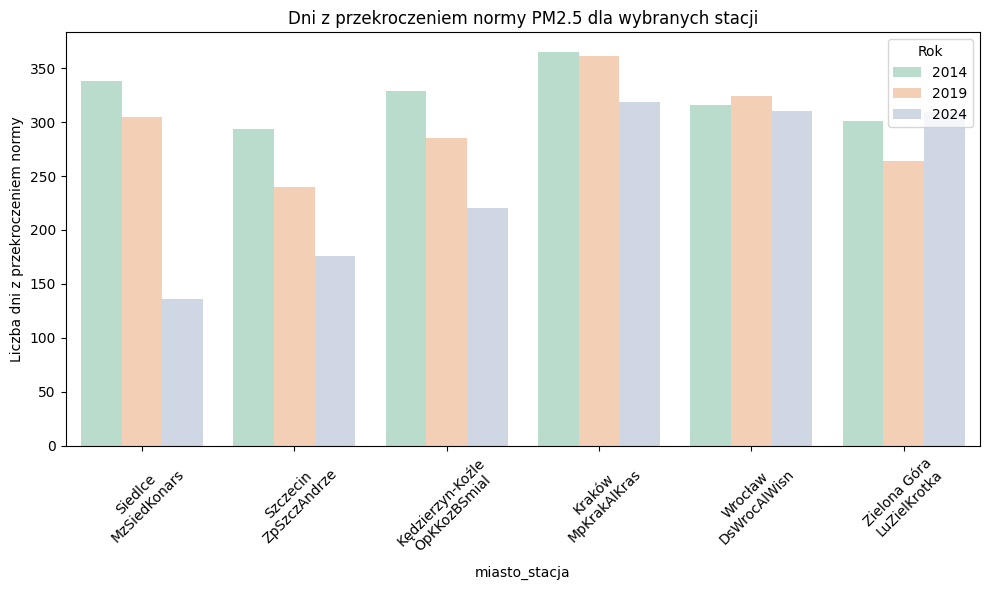

In [29]:
# wykres słupkowy dla 3 stacji z najmniejszą i 3 z największą liczbą dni przekroczenia normy w 2024 roku

min_stations = norms_df[2024].nsmallest(3).index.get_level_values(1).tolist()
max_stations = norms_df[2024].nlargest(3).index.get_level_values(1).tolist()
stations = min_stations + max_stations

idx = pd.IndexSlice
plot_df = norms_df.loc[idx[:, stations], :].reset_index()

# melt, żeby mieć kolumny: miasto, stacja, rok, liczba_dni
plot_df = plot_df.melt(id_vars=['level_0', 'level_1'], var_name='rok', value_name='liczba_dni')
plot_df = plot_df.rename(columns={'level_0': 'miasto', 'level_1': 'stacja'})

# połącz miasto i kod w jedną kolumnę
plot_df['miasto_stacja'] = plot_df['miasto'] + '\n' + plot_df['stacja']

# wykres
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df, x='miasto_stacja', y='liczba_dni', hue='rok', palette='Pastel2')
plt.xticks(rotation=45)
plt.ylabel('Liczba dni z przekroczeniem normy')
plt.title('Dni z przekroczeniem normy PM2.5 dla wybranych stacji')
plt.legend(title='Rok')
plt.tight_layout()
plt.show()

# Opis

Na wykresie widać, że w większości stacji z roku na rok nastepuje zmniejszenie liczby dni w których została przekroczona norma, co sugeruje poprawę jakości powietrza. Najmniej dni z przekroczoną normą w 2024 roku zanotowano w Siedlcach, co prawdopodobnie spowodowane jest brakiem danych pomiarowych z drugiej połowy tego roku (w praktyce nie powinniśmy brać pod uwagę danych z tej stacji, ponieważ nie oddają rzeczywistego stanu sytuacji). W każdym roku najwięcej dni z przekroczniem normy zanotowano w Krakowie, co wskazuje na poważny problem w tym mieście. Mimo spadków w tym okresie, liczba dni z przekroczeniami norm pozostaje istotna, co pokazuje potrzebę kontynuowania działań poprawiających jakość powietrza.

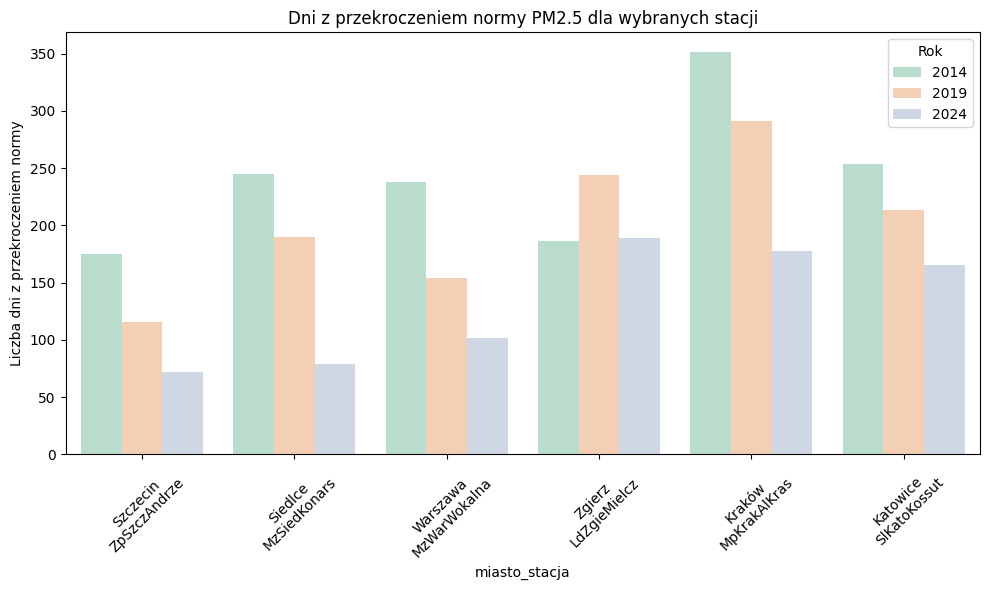

In [30]:
## Wersja ze średnimi dziennymi zamiast maksymalnych (tak jak sugeruje WHO) ##

df_all_days = df_all.copy().sort_index()
df_all_days['data'] = pd.to_datetime(df_all_days.index.date)
df_all_days = df_all_days.set_index('data')
df_all_max = df_all_days.groupby(['data']).mean() ### TUTAJ JEDYNA ZMIANA  ###

for year in [2014, 2019, 2024]:
    df_station = df_all_max[df_all_max.index.year == year] # dane dla danego roku
    norms[year] = np.array((df_station>norm).sum().values) # liczba dni przekroczenia normy dla każdej stacji

norms_df = pd.DataFrame(norms, index=df_all_max.columns)
norms_df.sort_values(by=2024) # sortowanie według liczby dni przekroczenia normy w 2024

# wykres słupkowy dla 3 stacji z najmniejszą i 3 z największą liczbą dni przekroczenia normy w 2024 roku

min_stations = norms_df[2024].nsmallest(3).index.get_level_values(1).tolist()
max_stations = norms_df[2024].nlargest(3).index.get_level_values(1).tolist()
stations = min_stations + max_stations

idx = pd.IndexSlice
plot_df = norms_df.loc[idx[:, stations], :].reset_index()

# melt, żeby mieć kolumny: miasto, stacja, rok, liczba_dni
plot_df = plot_df.melt(id_vars=['level_0', 'level_1'], var_name='rok', value_name='liczba_dni')
plot_df = plot_df.rename(columns={'level_0': 'miasto', 'level_1': 'stacja'})

# połącz miasto i kod w jedną kolumnę
plot_df['miasto_stacja'] = plot_df['miasto'] + '\n' + plot_df['stacja']

# wykres
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df, x='miasto_stacja', y='liczba_dni', hue='rok', palette='Pastel2')
plt.xticks(rotation=45)
plt.ylabel('Liczba dni z przekroczeniem normy')
plt.title('Dni z przekroczeniem normy PM2.5 dla wybranych stacji')
plt.legend(title='Rok')
plt.tight_layout()
plt.show()

# Opis

Na wykresie widać, że w większości stacji z roku na rok nastepuje zmniejszenie liczby dni w których została przekroczona norma, co sugeruje poprawę jakości powietrza. Jedyną stacją nie wykazującą poprawy jest Stacja w Zgierzu. Dla Siedlec zanotowano jeden z najniższych wyników w 2024 roku, co prawdopodobnie spowodowane jest brakiem danych pomiarowych z drugiej połowy tego roku (w praktyce nie powinniśmy brać pod uwagę danych z tej stacji, ponieważ nie oddają rzeczywistego stanu sytuacji). Najwięcej dni z przekroczniem normy notuje się w Krakowie, co wskazuje na poważny problem w tym mieście. Mimo spadków w tym okresie, liczba dni z przekroczeniami norm pozostaje istotna, co pokazuje potrzebę kontynuowania działań poprawiających jakość powietrza.